In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [180]:
#load csv GPU_Data.csv
cpu_df = pd.read_csv('PC_Part_Picker_Datasets/CPU_Data.csv')
cpu_df.head()


,Brand,Model,Core Count,Performance Core Clock,Boost Clock,TDP,Integrated Graphics,Sockets Supported,Rating,Rating Count,Price,Release Year,Socket Type
0,AMD,Ryzen 7 7800X3D,8,4.2 GHz,5 GHz,120 W,Radeon,Yes,5,208,369.00,2022.0,AM5
1,AMD,Ryzen 5 7600X,6,4.7 GHz,5.3 GHz,105 W,Radeon,Yes,5,113,218.46,2022.0,AM5
2,AMD,Ryzen 5 5600X,6,3.7 GHz,4.6 GHz,65 W,NaN,Yes,5,609,151.24,2021.0,AM4
3,Intel,Core i9-14900K,24,3.2 GHz,6 GHz,125 W,Intel UHD Graphics 770,Yes,5,13,544.99,2023.0,LGA 1700
4,AMD,Ryzen 5 7600,6,3.8 GHz,5.1 GHz,65 W,Radeon,Yes,5,65,260.73,2022.0,AM5


In [181]:
gpu_df = pd.read_csv('PC_Part_Picker_Datasets/GPU_Data.csv')
gpu_df.head()

,Name,Chipset,Memory,Core Clock,Boost Clock,Length,Rating,Rating Count,Price
0,MSI GeForce RTX 3060 Ventus 2X 12G,GeForce RTX 3060 12GB,12.0,1320 MHz,1777 MHz,235 mm,5,26,309.99
1,Gigabyte WINDFORCE OC,GeForce RTX 4070,12.0,1920 MHz,2490 MHz,261 mm,5,18,549.99
2,Asus DUAL OC,GeForce RTX 4060,8.0,1830 MHz,2535 MHz,227 mm,5,4,304.99
3,Asus ROG STRIX GAMING OC,GeForce RTX 4090,24.0,2235 MHz,2640 MHz,358 mm,5,8,2423.90
4,PNY VCNRTX6000ADA-PB,RTX 6000 Ada Generation,48.0,915 MHz,2505 MHz,267 mm,0,0,9999.00


In [182]:
mb_df = pd.read_csv('PC_Part_Picker_Datasets/MB_Data.csv')
mb_df.head()

,Name,Socket,Form Factor,Max Memory,Memory Slots,Rating,Rating Count,Price
0,Asus ROG STRIX B650-A GAMING WIFI,AM5,ATX,192 GB,4,5,23,259.99
1,MSI B650 GAMING PLUS WIFI,AM5,ATX,192 GB,4,5,6,159.99
2,MSI B760 GAMING PLUS WIFI,LGA1700,ATX,192 GB,4,5,4,159.99
3,MSI B550 GAMING GEN3,AM4,ATX,128 GB,4,4,3,99.99
4,MSI PRO Z790-A MAX WIFI,LGA1700,ATX,192 GB,4,5,4,239.99


In [183]:
memory_df = pd.read_csv('Memory_Data.csv')
memory_df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'Memory_Data.csv'

In [ ]:
power_df = pd.read_csv('Power_Data.csv')
power_df.head()

,Name,Type,Efficiency,Wattage,Modular,Rating,Rating Count,Price
0,Corsair RM750e,ATX,Rating80+ Gold,750 W,Full,5,69,$99.99
1,Corsair RM850e,ATX,Rating80+ Gold,850 W,Full,5,42,$119.99
2,Corsair RM1000e,ATX,Rating80+ Gold,1000 W,Full,5,26,$179.99
3,Corsair RM850x,ATX,Rating80+ Gold,850 W,Full,5,174,$134.99
4,Corsair CX650M,ATX,Rating80+ Bronze,650 W,Semi,5,16,$69.98


In [ ]:
storage_df = pd.read_csv('Storage_Data.csv')
storage_df.head()

,Name,Capacity,Price/GB,Type,Form Factor,Interface,Rating,Rating Count,Price
0,Samsung 980 Pro,2 TB,$166.99,SSD,M.2-2280,M.2 PCIe 4.0 X4,5,244,$166.99
1,Samsung 970 Evo Plus,1 TB,$94.99,SSD,M.2-2280,M.2 PCIe 3.0 X4,5,451,$94.99
2,Kingston NV2,1 TB,$60.99,SSD,M.2-2280,M.2 PCIe 4.0 X4,5,63,$60.99
3,Samsung 980 Pro,1 TB,$105.39,SSD,M.2-2280,M.2 PCIe 4.0 X4,5,286,$105.39
4,Samsung 990 Pro,4 TB,$339.99,SSD,M.2-2280,M.2 PCIe 4.0 X4,5,11,$339.99


In [ ]:
print(cpu_df.dtypes)


Brand                      object
Model                      object
Core Count                  int64
Performance Core Clock     object
Boost Clock                object
TDP                        object
Integrated Graphics        object
Sockets Supported          object
Rating                      int64
Rating Count                int64
Price                     float64
Release Year              float64
Socket Type                object
dtype: object


In [ ]:
#make release year datetime
cpu_df['Release Year'] = pd.to_datetime(cpu_df['Release Year'], format='%Y')
cpu_df['Release Year'] = cpu_df['Release Year'].dt.year


In [ ]:
#make price numeric
#memory
memory_df['Price'] = memory_df['Price'].str.replace('$', '')
memory_df['Price'] = memory_df['Price'].str.replace(',', '')
memory_df['Price'] = pd.to_numeric(memory_df['Price'])
#power
power_df['Price'] = power_df['Price'].str.replace('$', '')
power_df['Price'] = power_df['Price'].str.replace(',', '')
power_df['Price'] = pd.to_numeric(power_df['Price'])
#storage
storage_df['Price'] = storage_df['Price'].str.replace('$', '')
storage_df['Price'] = storage_df['Price'].str.replace(',', '')
storage_df['Price'] = pd.to_numeric(storage_df['Price'])



In [ ]:
#remove NaN values from price colum
mb_df = mb_df.dropna(subset=['Price'])
memory_df = memory_df.dropna(subset=['Price'])
power_df = power_df.dropna(subset=['Price'])
storage_df = storage_df.dropna(subset=['Price'])

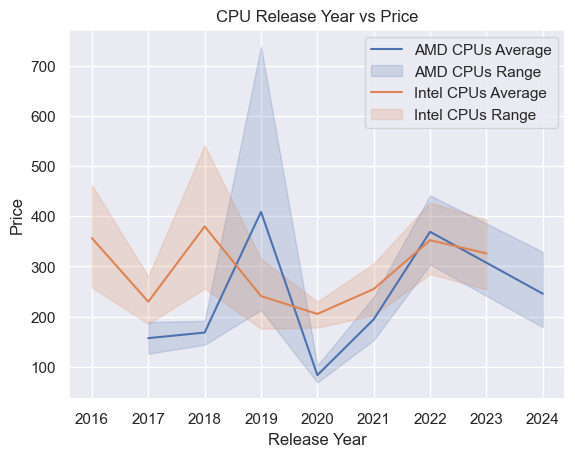

In [ ]:
amd_cpu_df = cpu_df[cpu_df['Brand'] == 'AMD']
intel_cpu_df = cpu_df[cpu_df['Brand'] == 'Intel']
#theme for seaborn
sns.set_theme(style='darkgrid')
sns.set_theme(style='darkgrid')
sns.lineplot(data=amd_cpu_df, x='Release Year', y='Price')
sns.lineplot(data=intel_cpu_df, x='Release Year', y='Price')
plt.xlabel('Release Year')
plt.ylabel('Price')
plt.title('CPU Release Year vs Price')
plt.legend(['AMD CPUs Average', 'AMD CPUs Range', 'Intel CPUs Average', 'Intel CPUs Range'])
plt.savefig('Visualizations/AMD_vs_Intel_line.png')
plt.show()



#save as png
#save in visualizations folder


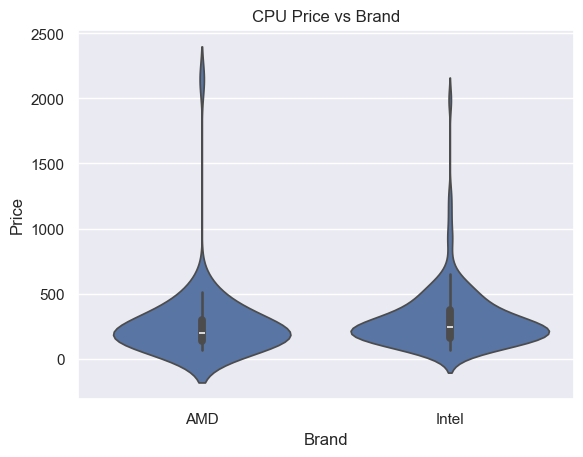

In [ ]:
#Create a violin plot of CPU Price vs Brand using seaborn
sns.violinplot(data=cpu_df, x='Brand', y='Price')
plt.xlabel('Brand')
plt.ylabel('Price')
plt.title('CPU Price vs Brand')
#save as png
plt.savefig('Visualizations/CPU_price_vs_brand_vio.png')
plt.show()



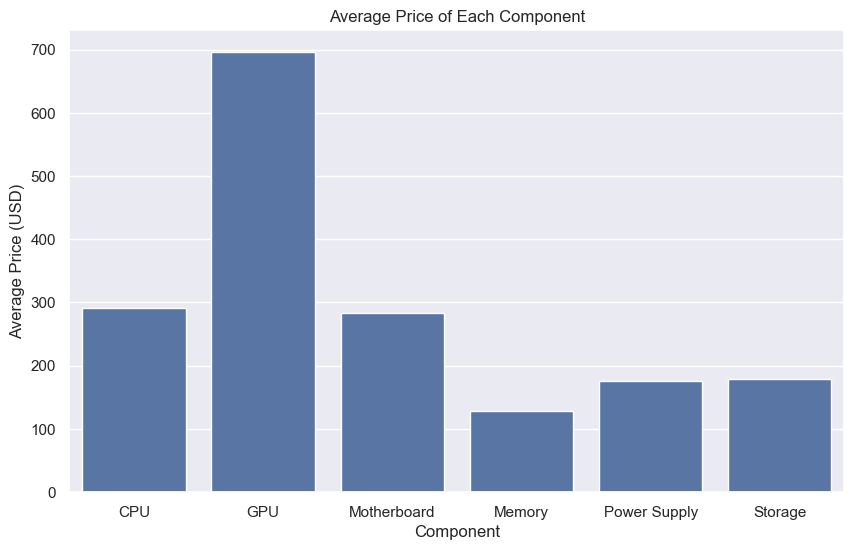

In [ ]:
#create a bar chart of the average price of each component
avg_price = [cpu_df['Price'].mean(), gpu_df['Price'].mean(), mb_df['Price'].mean(), memory_df['Price'].mean(), power_df['Price'].mean(), storage_df['Price'].mean()]
components = ['CPU', 'GPU', 'Motherboard', 'Memory', 'Power Supply', 'Storage']
plt.figure(figsize=(10, 6))
sns.barplot(x=components, y=avg_price)
plt.xlabel('Component')
plt.ylabel('Average Price (USD)')
plt.title('Average Price of Each Component')
#save as png
plt.savefig('Visualizations/avg_price_histo.png')
plt.show()



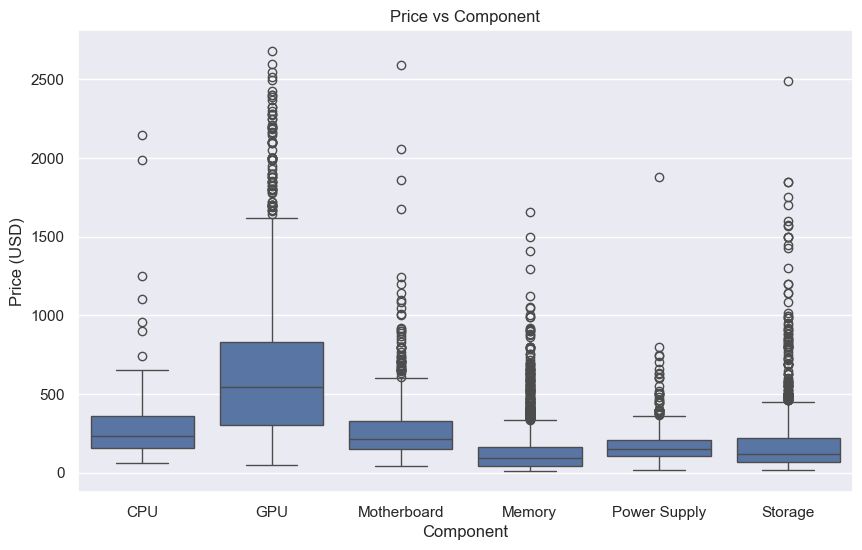

In [ ]:
#combine the dataframes for all components into one dataframe
#add a column for component type
cpu_df['Component'] = 'CPU'
gpu_df['Component'] = 'GPU'
mb_df['Component'] = 'Motherboard'
memory_df['Component'] = 'Memory'
power_df['Component'] = 'Power Supply'
storage_df['Component'] = 'Storage'
all_df = pd.concat([cpu_df, gpu_df, mb_df, memory_df, power_df, storage_df])
#remove outlier value > 3000
all_df = all_df[all_df['Price'] < 3000]

#Create a boxplot of price vs component using seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Component', y='Price', data=all_df)
plt.xlabel('Component')
plt.ylabel('Price (USD)')
plt.title('Price vs Component')
#save as png
plt.savefig('Visualizations/price_vs_component_boxplot.png')
plt.show()




In [ ]:
#change boost clock to numeric
cpu_df['Boost Clock'] = cpu_df['Boost Clock'].str.replace('GHz', '')
cpu_df['Boost Clock'] = pd.to_numeric(cpu_df['Boost Clock'])
cpu_df['Performance Core Clock'] = cpu_df['Performance Core Clock'].str.replace('GHz', '')
cpu_df['Performance Core Clock'] = pd.to_numeric(cpu_df['Performance Core Clock'])
power_df['Wattage'] = power_df['Wattage'].str.replace('W', '')
power_df['Wattage'] = pd.to_numeric(power_df['Wattage'])
power_df['Efficiency Rating'] = 0
power_df.loc[power_df['Efficiency'] == ' Rating80+ Bronze', 'Efficiency Rating'] = 1
power_df.loc[power_df['Efficiency'] == ' Rating80+ Silver', 'Efficiency Rating'] = 2
power_df.loc[power_df['Efficiency'] == ' Rating80+ Gold', 'Efficiency Rating'] = 3
power_df.loc[power_df['Efficiency'] == ' Rating80+ Platinum', 'Efficiency Rating'] = 4
power_df.loc[power_df['Efficiency'] == ' Rating80+ Titanium', 'Efficiency Rating'] = 5

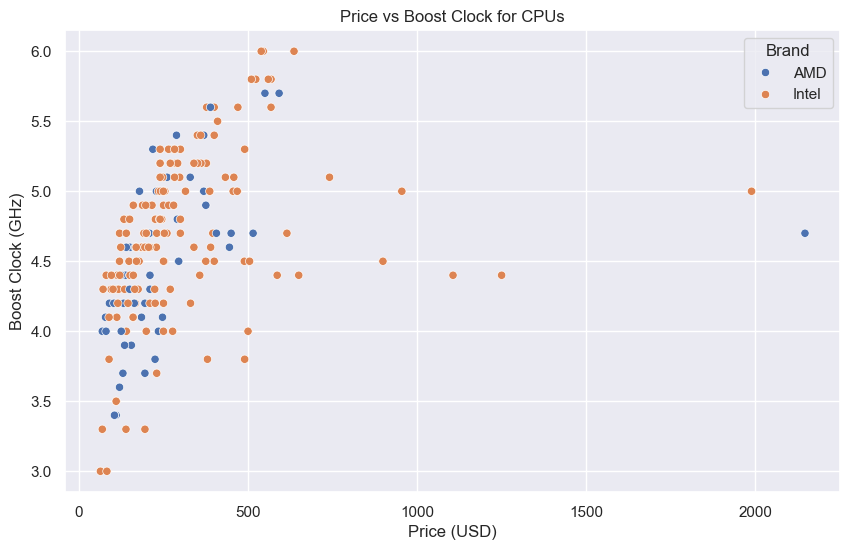

In [ ]:
#Create a scatter plot of price vs boost clock for CPUs
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price', y='Boost Clock',hue = 'Brand', data=cpu_df)
plt.xlabel('Price (USD)')
plt.ylabel('Boost Clock (GHz)')
plt.title('Price vs Boost Clock for CPUs')
#save as png
plt.savefig('Visualizations/price_vs_boost_scatter.png')
plt.show()

#Model Thought: Remove Outliers, Create a linear regression model, find the CPU with the best positive residual to determine the best value CPU.



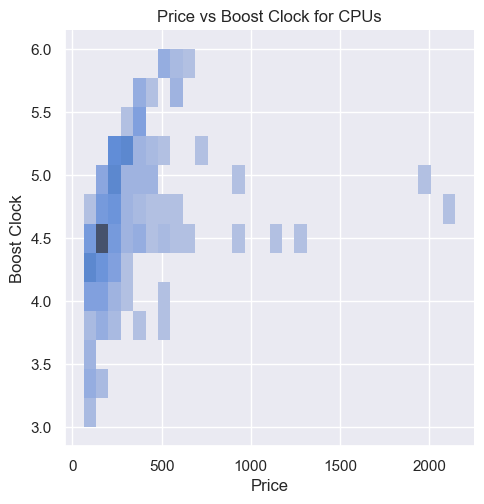

In [ ]:
sns.displot(data = cpu_df, x = 'Price', y = 'Boost Clock')
plt.xlabel('Price')
plt.ylabel('Boost Clock')
plt.title('Price vs Boost Clock for CPUs')
#save as png
plt.savefig('Visualizations/price_vs_boost_displot.png')
plt.show()




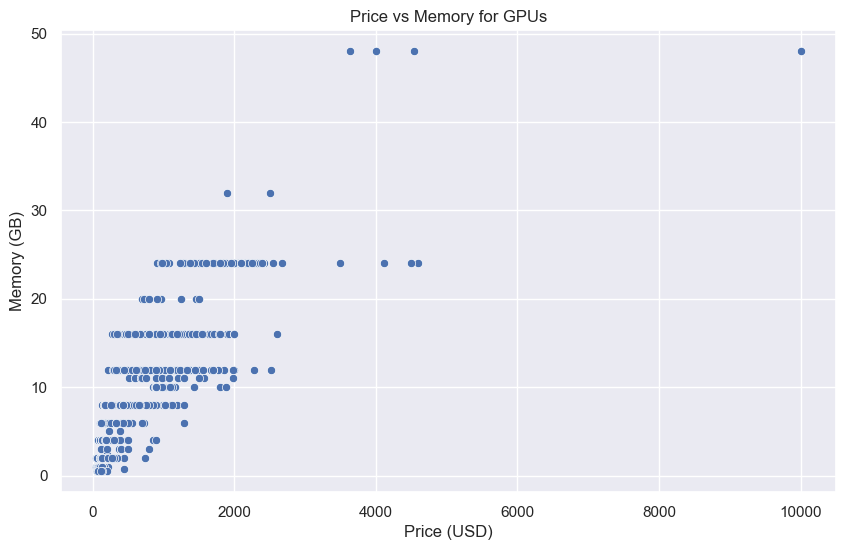

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price', y='Memory', data=gpu_df)
plt.xlabel('Price (USD)')
plt.ylabel('Memory (GB)')
plt.title('Price vs Memory for GPUs')
#save as png
plt.savefig('Visualizations/price_vs_memory_scatter.png')

plt.show()



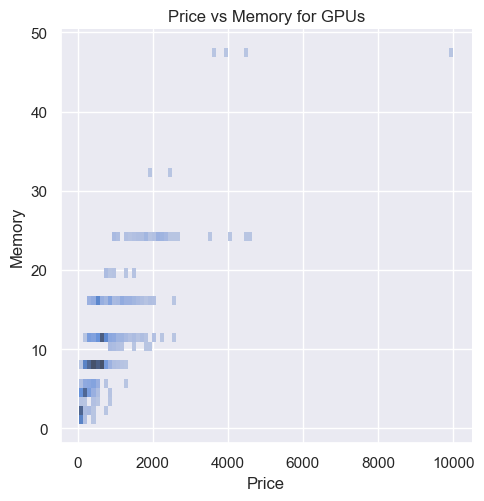

In [ ]:
sns.displot(data = gpu_df, x = 'Price', y = 'Memory')
plt.xlabel('Price')
plt.ylabel('Memory')
plt.title('Price vs Memory for GPUs')
#save as png
plt.savefig('Visualizations/price_vs_memory_displot.png')
plt.show()




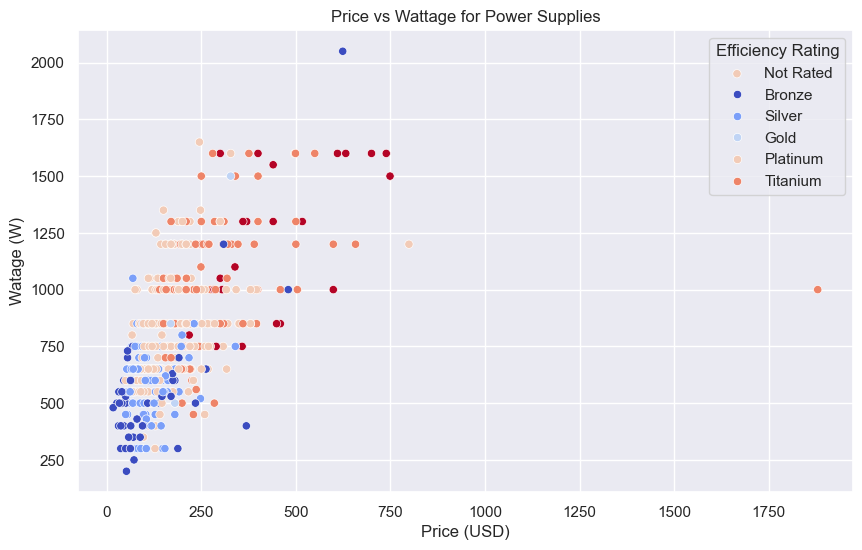

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price', y='Wattage',hue = 'Efficiency Rating', palette='coolwarm', data=power_df)
plt.xlabel('Price (USD)')
plt.ylabel('Watage (W)')
plt.title('Price vs Wattage for Power Supplies')
plt.legend(title='Efficiency Rating', loc='upper right', labels=['Not Rated','Bronze', 'Silver', 'Gold', 'Platinum', 'Titanium'])
#save as png
plt.savefig('Visualizations/price_vs_wattage_scatter.png')
plt.show()


